In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import OneHotEncoder
oe=OneHotEncoder()

from sklearn.preprocessing import OrdinalEncoder
ode=OrdinalEncoder()

from sklearn.model_selection import train_test_split
# for classification

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC

In [2]:
df=pd.read_csv("Ecommerce_Sales_Data_2024_2025.csv")
df

,Order ID,Order Date,Customer Name,Region,City,Category,Sub-Category,Product Name,Quantity,Unit Price,Discount,Sales,Profit,Payment Mode
0,10001,2024-10-19,Kashvi Varty,South,Bangalore,Books,Non-Fiction,Non-Fiction Ipsum,2,36294,5,68958.6,10525.09,Debit Card
1,10002,2025-08-30,Advik Desai,North,Delhi,Groceries,Rice,Rice Nemo,1,42165,20,33732.0,6299.66,Debit Card
2,10003,2023-11-04,Rhea Kalla,East,Patna,Kitchen,Juicer,Juicer Odio,4,64876,20,207603.2,19850.27,Credit Card
3,10004,2025-05-23,Anika Sen,East,Kolkata,Groceries,Oil,Oil Doloribus,5,37320,15,158610.0,36311.02,UPI
4,10005,2025-01-19,Akarsh Kaul,West,Pune,Clothing,Kids Wear,Kids Wear Quo,1,50037,10,45033.3,9050.04,Debit Card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,14996,2024-06-25,Nishith Kulkarni,East,Kolkata,Books,Fiction,Fiction Veritatis,3,60671,0,182013.0,11853.15,Debit Card
4996,14997,2024-12-22,Aaina Chander,North,Jaipur,Toys,Doll,Doll Nulla,5,70048,0,350240.0,31237.23,Credit Card
4997,14998,2025-04-15,Dhanush Gara,South,Bangalore,Beauty,Lipstick,Lipstick Eaque,1,42162,15,35837.7,7827.50,Debit Card
4998,14999,2024-07-08,Divyansh Malhotra,East,Kolkata,Electronics,Smartwatch,Smartwatch Adipisci,4,13568,10,48844.8,6603.86,Credit Card


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       5000 non-null   int64  
 1   Order Date     5000 non-null   object 
 2   Customer Name  5000 non-null   object 
 3   Region         5000 non-null   object 
 4   City           5000 non-null   object 
 5   Category       5000 non-null   object 
 6   Sub-Category   5000 non-null   object 
 7   Product Name   5000 non-null   object 
 8   Quantity       5000 non-null   int64  
 9   Unit Price     5000 non-null   int64  
 10  Discount       5000 non-null   int64  
 11  Sales          5000 non-null   float64
 12  Profit         5000 non-null   float64
 13  Payment Mode   5000 non-null   object 
dtypes: float64(2), int64(4), object(8)
memory usage: 547.0+ KB


In [5]:
df.isna().sum()

Order ID         0
Order Date       0
Customer Name    0
Region           0
City             0
Category         0
Sub-Category     0
Product Name     0
Quantity         0
Unit Price       0
Discount         0
Sales            0
Profit           0
Payment Mode     0
dtype: int64

In [6]:
df['Order Date']=pd.to_datetime(df['Order Date'])

In [7]:
df['Day'] = df['Order Date'].dt.day
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year
df['DayOfWeek'] = df['Order Date'].dt.dayofweek

In [8]:
profit_mean = df['Profit'].mean()

df['High_Profit'] = df['Profit'].apply(
    lambda x: 1 if x > profit_mean else 0
)


In [9]:
df

,Order ID,Order Date,Customer Name,Region,City,Category,Sub-Category,Product Name,Quantity,Unit Price,Discount,Sales,Profit,Payment Mode,Day,Month,Year,DayOfWeek,High_Profit
0,10001,2024-10-19,Kashvi Varty,South,Bangalore,Books,Non-Fiction,Non-Fiction Ipsum,2,36294,5,68958.6,10525.09,Debit Card,19,10,2024,5,0
1,10002,2025-08-30,Advik Desai,North,Delhi,Groceries,Rice,Rice Nemo,1,42165,20,33732.0,6299.66,Debit Card,30,8,2025,5,0
2,10003,2023-11-04,Rhea Kalla,East,Patna,Kitchen,Juicer,Juicer Odio,4,64876,20,207603.2,19850.27,Credit Card,4,11,2023,5,1
3,10004,2025-05-23,Anika Sen,East,Kolkata,Groceries,Oil,Oil Doloribus,5,37320,15,158610.0,36311.02,UPI,23,5,2025,4,1
4,10005,2025-01-19,Akarsh Kaul,West,Pune,Clothing,Kids Wear,Kids Wear Quo,1,50037,10,45033.3,9050.04,Debit Card,19,1,2025,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,14996,2024-06-25,Nishith Kulkarni,East,Kolkata,Books,Fiction,Fiction Veritatis,3,60671,0,182013.0,11853.15,Debit Card,25,6,2024,1,0
4996,14997,2024-12-22,Aaina Chander,North,Jaipur,Toys,Doll,Doll Nulla,5,70048,0,350240.0,31237.23,Credit Card,22,12,2024,6,1
4997,14998,2025-04-15,Dhanush Gara,South,Bangalore,Beauty,Lipstick,Lipstick Eaque,1,42162,15,35837.7,7827.50,Debit Card,15,4,2025,1,0
4998,14999,2024-07-08,Divyansh Malhotra,East,Kolkata,Electronics,Smartwatch,Smartwatch Adipisci,4,13568,10,48844.8,6603.86,Credit Card,8,7,2024,0,0


In [10]:
df['High_Profit'].value_counts()


High_Profit
0    3134
1    1866
Name: count, dtype: int64

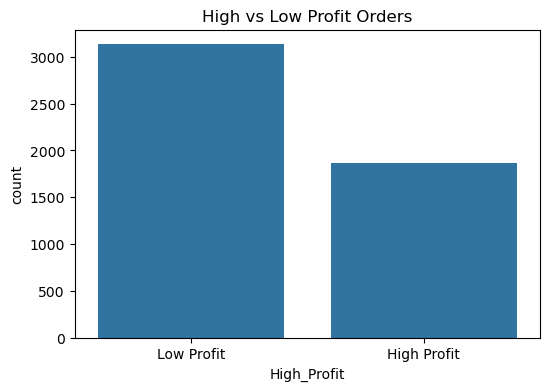

In [12]:
## high vs low profit count
plt.figure(figsize=(6,4))
sns.countplot(x='High_Profit', data=df)
plt.title("High vs Low Profit Orders")
plt.xticks([0,1], ['Low Profit','High Profit'])
plt.show()

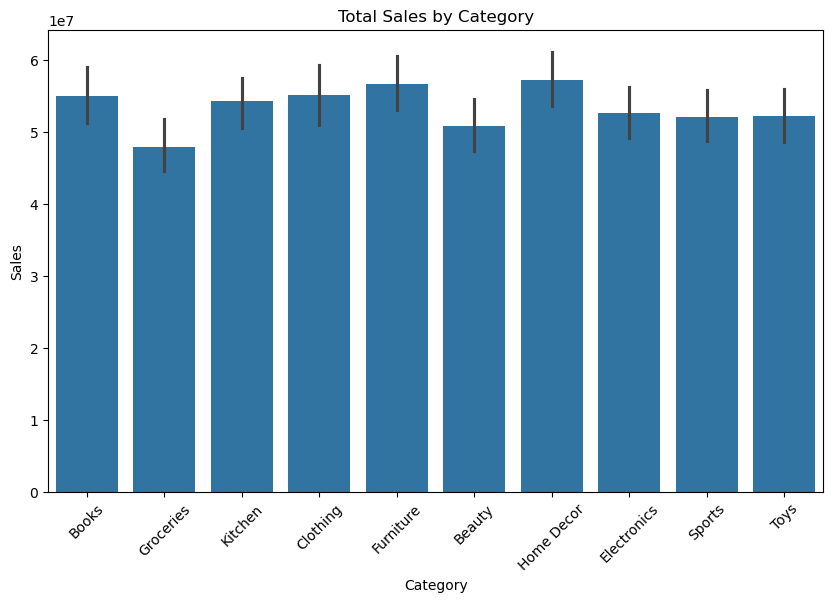

In [13]:
## sales by category
plt.figure(figsize=(10,6))
sns.barplot(x='Category', y='Sales', data=df, estimator=sum)
plt.title("Total Sales by Category")
plt.xticks(rotation=45)
plt.show()

Sales are relatively strong across most categories, with Furniture, Home Decor, and Clothing slightly leading, indicating diversified revenue contribution rather than dependency on a single category.

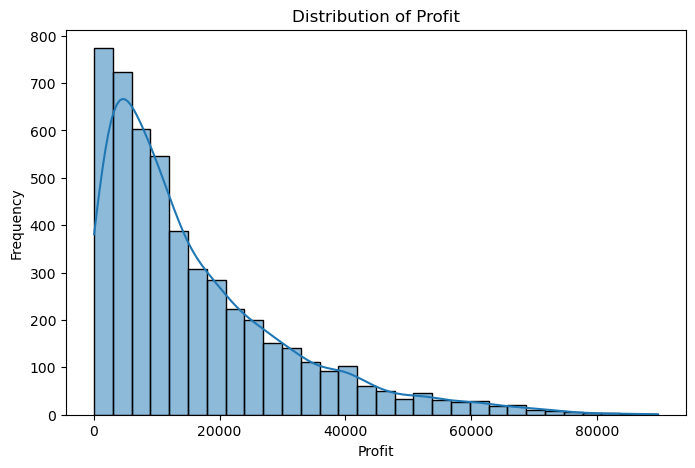

In [11]:
##distribution of profit
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['Profit'], bins=30, kde=True)
plt.title("Distribution of Profit")
plt.xlabel("Profit")
plt.ylabel("Frequency")
plt.show()

The profit distribution is right-skewed, indicating that most orders generate low to moderate profit, while only a few transactions contribute very high profit. This supports the need to classify orders into high and low profit categories.

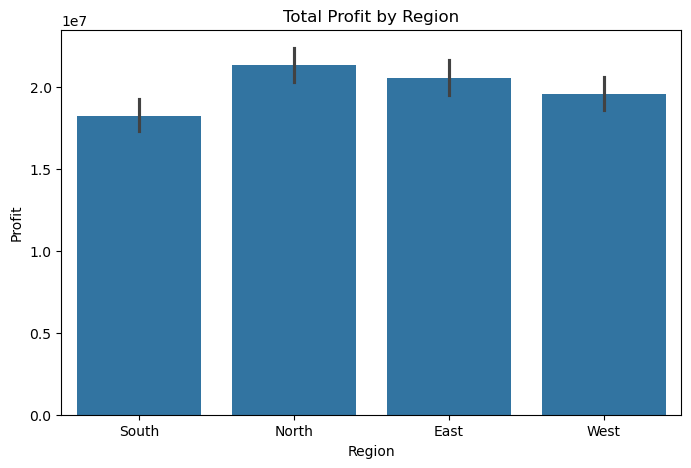

In [14]:
##profit by region
plt.figure(figsize=(8,5))
sns.barplot(x='Region', y='Profit', data=df, estimator=sum)
plt.title("Total Profit by Region")
plt.show()

The North region generates the highest profit compared to other regions, suggesting stronger market performance and potential opportunities for regional expansion strategies.

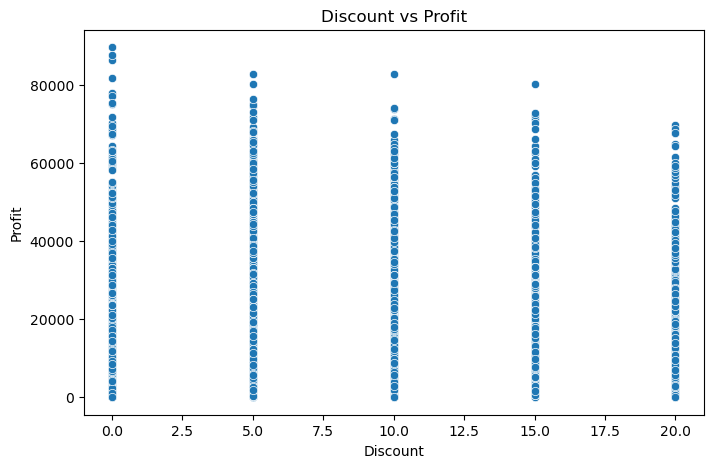

In [15]:
##discount vs profit
plt.figure(figsize=(8,5))
sns.scatterplot(x='Discount', y='Profit', data=df)
plt.title("Discount vs Profit")
plt.show()

Higher discounts generally show a tendency toward lower profit levels, suggesting that aggressive discount strategies may reduce overall profitability.

In [53]:
df = df.drop(['Profit'], axis=1)

In [54]:
df

,Order ID,Order Date,Customer Name,Region,City,Category,Sub-Category,Product Name,Quantity,Unit Price,Discount,Sales,Payment Mode,Day,Month,Year,DayOfWeek,High_Profit
0,10001,2024-10-19,Kashvi Varty,South,Bangalore,Books,Non-Fiction,Non-Fiction Ipsum,2,36294,5,68958.6,Debit Card,19,10,2024,5,0
1,10002,2025-08-30,Advik Desai,North,Delhi,Groceries,Rice,Rice Nemo,1,42165,20,33732.0,Debit Card,30,8,2025,5,0
2,10003,2023-11-04,Rhea Kalla,East,Patna,Kitchen,Juicer,Juicer Odio,4,64876,20,207603.2,Credit Card,4,11,2023,5,1
3,10004,2025-05-23,Anika Sen,East,Kolkata,Groceries,Oil,Oil Doloribus,5,37320,15,158610.0,UPI,23,5,2025,4,1
4,10005,2025-01-19,Akarsh Kaul,West,Pune,Clothing,Kids Wear,Kids Wear Quo,1,50037,10,45033.3,Debit Card,19,1,2025,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,14996,2024-06-25,Nishith Kulkarni,East,Kolkata,Books,Fiction,Fiction Veritatis,3,60671,0,182013.0,Debit Card,25,6,2024,1,0
4996,14997,2024-12-22,Aaina Chander,North,Jaipur,Toys,Doll,Doll Nulla,5,70048,0,350240.0,Credit Card,22,12,2024,6,1
4997,14998,2025-04-15,Dhanush Gara,South,Bangalore,Beauty,Lipstick,Lipstick Eaque,1,42162,15,35837.7,Debit Card,15,4,2025,1,0
4998,14999,2024-07-08,Divyansh Malhotra,East,Kolkata,Electronics,Smartwatch,Smartwatch Adipisci,4,13568,10,48844.8,Credit Card,8,7,2024,0,0


In [55]:
df = df.drop(['Order ID', 'Customer Name', 'Product Name', 'Order Date'], axis=1)


In [38]:
#df = df.drop(['Order ID', 'Customer Name', 'Product Name','Day','DayOfWeek'], axis=1)

In [40]:
#df['Order Date'] = pd.to_datetime(df['Order Date'])


In [42]:
# df.to_csv("ecommerce_dashboard.csv", index=False)


In [43]:
#import os
# print(os.getcwd())


C:\Users\HI


In [56]:
df = pd.get_dummies(df, drop_first=True)


In [57]:
df

,Quantity,Unit Price,Discount,Sales,Day,Month,Year,DayOfWeek,High_Profit,Region_North,...,Sub-Category_Textbook,Sub-Category_Vase,Sub-Category_Wall Art,Sub-Category_Wheat,Sub-Category_Women's Wear,Sub-Category_Yoga Mat,Payment Mode_Credit Card,Payment Mode_Debit Card,Payment Mode_Net Banking,Payment Mode_UPI
0,2,36294,5,68958.6,19,10,2024,5,0,False,...,False,False,False,False,False,False,False,True,False,False
1,1,42165,20,33732.0,30,8,2025,5,0,True,...,False,False,False,False,False,False,False,True,False,False
2,4,64876,20,207603.2,4,11,2023,5,1,False,...,False,False,False,False,False,False,True,False,False,False
3,5,37320,15,158610.0,23,5,2025,4,1,False,...,False,False,False,False,False,False,False,False,False,True
4,1,50037,10,45033.3,19,1,2025,6,0,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3,60671,0,182013.0,25,6,2024,1,0,False,...,False,False,False,False,False,False,False,True,False,False
4996,5,70048,0,350240.0,22,12,2024,6,1,True,...,False,False,False,False,False,False,True,False,False,False
4997,1,42162,15,35837.7,15,4,2025,1,0,False,...,False,False,False,False,False,False,False,True,False,False
4998,4,13568,10,48844.8,8,7,2024,0,0,False,...,False,False,False,False,False,False,True,False,False,False


In [58]:
df = df.astype(int)


In [59]:
df

,Quantity,Unit Price,Discount,Sales,Day,Month,Year,DayOfWeek,High_Profit,Region_North,...,Sub-Category_Textbook,Sub-Category_Vase,Sub-Category_Wall Art,Sub-Category_Wheat,Sub-Category_Women's Wear,Sub-Category_Yoga Mat,Payment Mode_Credit Card,Payment Mode_Debit Card,Payment Mode_Net Banking,Payment Mode_UPI
0,2,36294,5,68958,19,10,2024,5,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,42165,20,33732,30,8,2025,5,0,1,...,0,0,0,0,0,0,0,1,0,0
2,4,64876,20,207603,4,11,2023,5,1,0,...,0,0,0,0,0,0,1,0,0,0
3,5,37320,15,158610,23,5,2025,4,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1,50037,10,45033,19,1,2025,6,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3,60671,0,182013,25,6,2024,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4996,5,70048,0,350240,22,12,2024,6,1,1,...,0,0,0,0,0,0,1,0,0,0
4997,1,42162,15,35837,15,4,2025,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4998,4,13568,10,48844,8,7,2024,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [60]:
df = df.drop('Sales', axis=1)


In [61]:
df

,Quantity,Unit Price,Discount,Day,Month,Year,DayOfWeek,High_Profit,Region_North,Region_South,...,Sub-Category_Textbook,Sub-Category_Vase,Sub-Category_Wall Art,Sub-Category_Wheat,Sub-Category_Women's Wear,Sub-Category_Yoga Mat,Payment Mode_Credit Card,Payment Mode_Debit Card,Payment Mode_Net Banking,Payment Mode_UPI
0,2,36294,5,19,10,2024,5,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,1,42165,20,30,8,2025,5,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,4,64876,20,4,11,2023,5,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,5,37320,15,23,5,2025,4,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,50037,10,19,1,2025,6,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3,60671,0,25,6,2024,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4996,5,70048,0,22,12,2024,6,1,1,0,...,0,0,0,0,0,0,1,0,0,0
4997,1,42162,15,15,4,2025,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4998,4,13568,10,8,7,2024,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [62]:
#feature selection
x = df.drop('High_Profit', axis=1)
x

,Quantity,Unit Price,Discount,Day,Month,Year,DayOfWeek,Region_North,Region_South,Region_West,...,Sub-Category_Textbook,Sub-Category_Vase,Sub-Category_Wall Art,Sub-Category_Wheat,Sub-Category_Women's Wear,Sub-Category_Yoga Mat,Payment Mode_Credit Card,Payment Mode_Debit Card,Payment Mode_Net Banking,Payment Mode_UPI
0,2,36294,5,19,10,2024,5,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,1,42165,20,30,8,2025,5,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,4,64876,20,4,11,2023,5,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,5,37320,15,23,5,2025,4,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,50037,10,19,1,2025,6,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3,60671,0,25,6,2024,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4996,5,70048,0,22,12,2024,6,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4997,1,42162,15,15,4,2025,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4998,4,13568,10,8,7,2024,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [63]:
y = df['High_Profit']
y

0       0
1       0
2       1
3       1
4       0
       ..
4995    0
4996    1
4997    0
4998    0
4999    0
Name: High_Profit, Length: 5000, dtype: int64

In [64]:
# split the data into train or test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x_train.shape)
print(y_test.shape)

(4000, 91)
(1000,)


In [65]:
#model train
model1=LogisticRegression()
model1.fit(x_train,y_train)

LogisticRegression()

In [66]:
y_pred=model1.predict(x_test)
y_pred

array([0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,

In [67]:
y_test

1501    0
2586    1
2653    1
1055    1
705     1
       ..
4711    0
2313    1
3214    0
2732    0
1926    1
Name: High_Profit, Length: 1000, dtype: int64

In [68]:
ss=StandardScaler()
x_scaled=ss.fit_transform(x)

In [69]:
# matric table-which display the number of correctly predicted value and incorrected predicted values
conf_metrics=confusion_matrix(y_test,y_pred)
print("confusion matric is :\n",conf_metrics)

confusion matric is :
 [[553  76]
 [ 84 287]]


In [70]:
# % of how many correct prediction were made
#TP+TN/TP+TN+FP+FN
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.84


In [71]:
class_rep=classification_report(y_test,y_pred)
print("classifiction Report is :\n",class_rep)

classifiction Report is :
               precision    recall  f1-score   support

           0       0.87      0.88      0.87       629
           1       0.79      0.77      0.78       371

    accuracy                           0.84      1000
   macro avg       0.83      0.83      0.83      1000
weighted avg       0.84      0.84      0.84      1000



In [72]:
#feature selection
x = df.drop('High_Profit', axis=1)
x

,Quantity,Unit Price,Discount,Day,Month,Year,DayOfWeek,Region_North,Region_South,Region_West,...,Sub-Category_Textbook,Sub-Category_Vase,Sub-Category_Wall Art,Sub-Category_Wheat,Sub-Category_Women's Wear,Sub-Category_Yoga Mat,Payment Mode_Credit Card,Payment Mode_Debit Card,Payment Mode_Net Banking,Payment Mode_UPI
0,2,36294,5,19,10,2024,5,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,1,42165,20,30,8,2025,5,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,4,64876,20,4,11,2023,5,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,5,37320,15,23,5,2025,4,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,50037,10,19,1,2025,6,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3,60671,0,25,6,2024,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4996,5,70048,0,22,12,2024,6,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4997,1,42162,15,15,4,2025,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4998,4,13568,10,8,7,2024,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [73]:
y = df['High_Profit']
y

0       0
1       0
2       1
3       1
4       0
       ..
4995    0
4996    1
4997    0
4998    0
4999    0
Name: High_Profit, Length: 5000, dtype: int64

In [74]:
#train the decision Tree classifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x_train.shape)
print(y_test.shape)

(4000, 91)
(1000,)


In [76]:
#make prediction
y_pred=model.predict(x_test)
print("Prediction:",y_pred)

Prediction: [0 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1
 0 0 1 0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 1
 1 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 1
 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1
 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0
 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0
 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0
 1 0 0 1 1 1 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0
 0 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 1 1 0 1 0 1 0 0 1
 0 1 1 1 0 1 

In [77]:
#calculate accuracy 
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.811


In [78]:
class_rep=classification_report(y_test,y_pred)
print("classifiction Report is :\n",class_rep)

classifiction Report is :
               precision    recall  f1-score   support

           0       0.86      0.84      0.85       629
           1       0.74      0.76      0.75       371

    accuracy                           0.81      1000
   macro avg       0.80      0.80      0.80      1000
weighted avg       0.81      0.81      0.81      1000



In [79]:
conf_metrics=confusion_matrix(y_test,y_pred)
print("confusion matric is :\n",conf_metrics)

confusion matric is :
 [[528 101]
 [ 88 283]]


In [80]:
#feature selection
x = df.drop('High_Profit', axis=1)
x

,Quantity,Unit Price,Discount,Day,Month,Year,DayOfWeek,Region_North,Region_South,Region_West,...,Sub-Category_Textbook,Sub-Category_Vase,Sub-Category_Wall Art,Sub-Category_Wheat,Sub-Category_Women's Wear,Sub-Category_Yoga Mat,Payment Mode_Credit Card,Payment Mode_Debit Card,Payment Mode_Net Banking,Payment Mode_UPI
0,2,36294,5,19,10,2024,5,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,1,42165,20,30,8,2025,5,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,4,64876,20,4,11,2023,5,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,5,37320,15,23,5,2025,4,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,50037,10,19,1,2025,6,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3,60671,0,25,6,2024,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4996,5,70048,0,22,12,2024,6,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4997,1,42162,15,15,4,2025,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4998,4,13568,10,8,7,2024,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [81]:
y = df['High_Profit']
y

0       0
1       0
2       1
3       1
4       0
       ..
4995    0
4996    1
4997    0
4998    0
4999    0
Name: High_Profit, Length: 5000, dtype: int64

In [82]:
#splitting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x_train.shape)
print(y_test.shape)

(4000, 91)
(1000,)


In [83]:
# train the random forest classifier
rf_model= RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [84]:
#make prediction
y_pred=rf_model.predict(x_test)
y_pred

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,

In [85]:
y_test

1501    0
2586    1
2653    1
1055    1
705     1
       ..
4711    0
2313    1
3214    0
2732    0
1926    1
Name: High_Profit, Length: 1000, dtype: int64

In [86]:
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix:\n",cm)

confusion matrix:
 [[550  79]
 [ 68 303]]


In [87]:
print("Accuracy score",accuracy_score(y_test,y_pred))
print("\nClassification report:\n",classification_report(y_test,y_pred))

Accuracy score 0.853

Classification report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       629
           1       0.79      0.82      0.80       371

    accuracy                           0.85      1000
   macro avg       0.84      0.85      0.84      1000
weighted avg       0.85      0.85      0.85      1000



In [88]:
#feature selection
x = df.drop('High_Profit', axis=1)
x

,Quantity,Unit Price,Discount,Day,Month,Year,DayOfWeek,Region_North,Region_South,Region_West,...,Sub-Category_Textbook,Sub-Category_Vase,Sub-Category_Wall Art,Sub-Category_Wheat,Sub-Category_Women's Wear,Sub-Category_Yoga Mat,Payment Mode_Credit Card,Payment Mode_Debit Card,Payment Mode_Net Banking,Payment Mode_UPI
0,2,36294,5,19,10,2024,5,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,1,42165,20,30,8,2025,5,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,4,64876,20,4,11,2023,5,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,5,37320,15,23,5,2025,4,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,50037,10,19,1,2025,6,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3,60671,0,25,6,2024,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4996,5,70048,0,22,12,2024,6,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4997,1,42162,15,15,4,2025,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4998,4,13568,10,8,7,2024,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [89]:
y = df['High_Profit']
y

0       0
1       0
2       1
3       1
4       0
       ..
4995    0
4996    1
4997    0
4998    0
4999    0
Name: High_Profit, Length: 5000, dtype: int64

In [90]:
#splitting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x_train.shape)
print(y_test.shape)

(4000, 91)
(1000,)


In [91]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [92]:
#prediction
y_pred_knn=knn.predict(x_test)
y_pred_knn

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,

In [93]:
y_test

1501    0
2586    1
2653    1
1055    1
705     1
       ..
4711    0
2313    1
3214    0
2732    0
1926    1
Name: High_Profit, Length: 1000, dtype: int64

In [94]:
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix:\n",cm)

confusion matrix:
 [[550  79]
 [ 68 303]]


In [95]:
print("Accuracy score",accuracy_score(y_test,y_pred))

Accuracy score 0.853


In [96]:
print("\nClassification report:\n",classification_report(y_test,y_pred))


Classification report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       629
           1       0.79      0.82      0.80       371

    accuracy                           0.85      1000
   macro avg       0.84      0.85      0.84      1000
weighted avg       0.85      0.85      0.85      1000



In [97]:
#feature selection
x = df.drop('High_Profit', axis=1)
x

,Quantity,Unit Price,Discount,Day,Month,Year,DayOfWeek,Region_North,Region_South,Region_West,...,Sub-Category_Textbook,Sub-Category_Vase,Sub-Category_Wall Art,Sub-Category_Wheat,Sub-Category_Women's Wear,Sub-Category_Yoga Mat,Payment Mode_Credit Card,Payment Mode_Debit Card,Payment Mode_Net Banking,Payment Mode_UPI
0,2,36294,5,19,10,2024,5,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,1,42165,20,30,8,2025,5,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,4,64876,20,4,11,2023,5,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,5,37320,15,23,5,2025,4,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,50037,10,19,1,2025,6,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3,60671,0,25,6,2024,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4996,5,70048,0,22,12,2024,6,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4997,1,42162,15,15,4,2025,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4998,4,13568,10,8,7,2024,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [98]:
y = df['High_Profit']
y

0       0
1       0
2       1
3       1
4       0
       ..
4995    0
4996    1
4997    0
4998    0
4999    0
Name: High_Profit, Length: 5000, dtype: int64

In [99]:
ss=StandardScaler()
x_scaled=ss.fit_transform(x)

In [100]:
x_scaled

array([[-0.70248118, -0.15186073, -0.71301991, ...,  1.99625772,
        -0.50312308, -0.49624713],
       [-1.41019947,  0.10530653,  1.40444172, ...,  1.99625772,
        -0.50312308, -0.49624713],
       [ 0.71295541,  1.10011584,  1.40444172, ..., -0.50093733,
        -0.50312308, -0.49624713],
       ...,
       [-1.41019947,  0.10517512,  0.69862117, ...,  1.99625772,
        -0.50312308, -0.49624713],
       [ 0.71295541, -1.14732709, -0.00719937, ..., -0.50093733,
        -0.50312308, -0.49624713],
       [-1.41019947,  1.62075798, -0.00719937, ..., -0.50093733,
         1.98758523, -0.49624713]])

In [101]:
#train and test
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(y_test.shape)

(4000, 91)
(1000,)


In [102]:
model=SVC(kernel='poly',class_weight='balanced')
model.fit(x_train,y_train)

SVC(class_weight='balanced', kernel='poly')

In [103]:
y_pred = model.predict(x_test)
y_pred

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,

In [104]:
acc=accuracy_score(y_test,y_pred)
acc

0.753

In [105]:
conf_metrics=confusion_matrix(y_test,y_pred)
conf_metrics

array([[479, 150],
       [ 97, 274]])

In [106]:
class_rep=classification_report(y_test,y_pred)
print("classifiction Report is :\n",class_rep)

classifiction Report is :
               precision    recall  f1-score   support

           0       0.83      0.76      0.80       629
           1       0.65      0.74      0.69       371

    accuracy                           0.75      1000
   macro avg       0.74      0.75      0.74      1000
weighted avg       0.76      0.75      0.76      1000



In [101]:
import pandas as pd

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
})

importance_df = importance_df.sort_values(
    by='Importance',
    ascending=False
)

print(importance_df.head(10))


                     Feature  Importance
1                 Unit Price    0.311243
0                   Quantity    0.224279
3                        Day    0.049663
4                      Month    0.037902
6                  DayOfWeek    0.033982
2                   Discount    0.028741
5                       Year    0.017835
89  Payment Mode_Net Banking    0.009534
90          Payment Mode_UPI    0.009246
87  Payment Mode_Credit Card    0.009198


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 92 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Quantity                    5000 non-null   int64
 1   Unit Price                  5000 non-null   int64
 2   Discount                    5000 non-null   int64
 3   Day                         5000 non-null   int64
 4   Month                       5000 non-null   int64
 5   Year                        5000 non-null   int64
 6   DayOfWeek                   5000 non-null   int64
 7   High_Profit                 5000 non-null   int64
 8   Region_North                5000 non-null   int64
 9   Region_South                5000 non-null   int64
 10  Region_West                 5000 non-null   int64
 11  City_Amritsar               5000 non-null   int64
 12  City_Bangalore              5000 non-null   int64
 13  City_Bhubaneswar            5000 non-null   int64
 14  City_Cha

In [103]:
df.to_csv("ecommerce_ml_final.csv", index=False)


In [104]:
import os
print(os.getcwd())


C:\Users\HI
